In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
from sklearn import linear_model
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import pickle
from matplotlib import style

In [2]:
data=pd.read_csv("'C:/Users/User/MachineLearning/student-mat.csv", sep=";")

In [3]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [4]:
data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [5]:
data = data[["G1", "G2", "G3", "studytime", "failures", "absences" ]]
predict = "G3"

In [6]:
X = np.array(data.drop([predict],1))
y = np.array(data[predict])
x_train, x_test, y_train, y_test = sk.model_selection.train_test_split(X, y, test_size = 0.2)
linear = linear_model.LinearRegression()
linear.fit(x_train, y_train)

LinearRegression()

In [8]:
#Save the best prediction in a pickle file 
best = 0
for _ in range(30):

    accuracy = linear.score(x_test, y_test)
    
    if accuracy > best:
        best =accuracy
        with open("studentmodel.pickle", "wb") as f:
            pickle.dump(linear, f)

#pickle_in = open("studentmodel.pickle", "rb")
#linear = pickle.load(pickle_in)

In [16]:
print('Coeff:\n', linear.coef_)
print("Intercept:\n" ,linear.intercept_)

Coeff:
 [ 0.1371298   0.98175702 -0.213043   -0.30303716  0.05744671]
Intercept:
 -1.365604604453587


In [17]:
predictions = linear.predict(x_test)
for x in range(len(predictions)):
    print(predictions[x], x_test[x], y_test[x])

14.315554645648971 [14 14  1  0  4] 14
11.749844598489203 [12 12  2  0  2] 11
14.969375247947411 [14 15  2  0  2] 15
8.415420538289618 [10  9  2  0  0] 9
13.134058098686648 [13 12  1  0 20] 12
7.618977564453775 [8 8 2 0 8] 6
7.5779451310030215 [7 9 4 0 0] 0
13.813555436019568 [15 14  4  0  4] 14
9.184134551329434 [10 10  3  0  0] 9
14.83224544771096 [13 15  2  0  2] 16
12.174537471853293 [14 11  1  0 18] 13
-0.9689118096121014 [6 0 2 0 0] 0
10.790323971655846 [13 11  2  0  0] 10
11.583937242220243 [13 12  2  1  2] 12
12.06574727468082 [14 12  2  1  8] 12
8.317270945742374 [10  9  3  0  2] 10
8.813777584070829 [8 9 1 0 8] 10
7.742637056793555 [7 9 2 2 6] 8
12.307567834001945 [12 12  1  0  8] 12
14.14149185004956 [15 14  3  0  6] 14
12.072288441218246 [11 12  2  0 10] 13
13.064248109203385 [14 13  3  1 12] 13
-0.7558688063234827 [6 0 1 0 0] 0
10.104674970473578 [ 8 11  2  0  0] 11
8.006694005609758 [6 9 1 1 4] 8
12.398172629486695 [11 13  4  0  6] 14
5.271803091883574 [7 6 1 0 0] 0
10.24

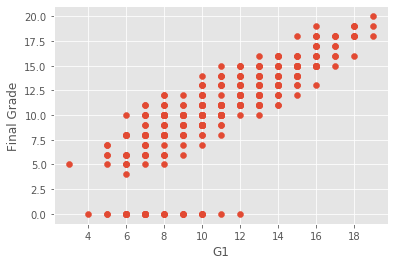

In [22]:
# Visualizations
style.use("ggplot")
plt.scatter(data["G1"], data["G3"] )
plt.xlabel(p)
plt.ylabel("Final Grade")
plt.show()